# Competitive Gradient Optimisation

In [1]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Oracles

###  $f(x,y) = x y$

In [8]:
def oracle(x,y,a):
    gx = y
    gy = x
    gxy = 1
    gax = (gx+a*gxy*gy)/(1+a**2)
    gay = (-gy+a*gxy*gx)/(1+a**2)
    return([gx,gy,gax,gay])

### $f(x,y) = \frac{k}{2}(x^2-y^2)-xy$

In [4]:
def oracle(x,y,a):
    gx = k*x-y
    gy = -k*y-x
    gxy = -1
    gax = (gx+a*gxy*gy)/(1+a**2)
    gay = (-gy+a*gxy*gx)/(1+a**2)
    return([gx,gy,gax,gay])

###  $f(x,y) = x^\top A y$

In [20]:
m=4
n=5
def oracle(x,y,a):
    gx = np.dot(A,y)
    gy = -np.dot(x,A)
    b = np.concatenate((gx,gy))
    B = np.zeros((m+n,m+n))
    B[0:m,0:m] = np.identity(m)
    B[m:m+n,m:m+n]= np.identity(n)
    B[m:m+n,:m] = -a*A.T
    B[:m,m:m+n] = a*A
    d = np.linalg.lstsq(B, b)[0] 
    gax = d[:m]
    gay = d[m:]
    return(gx,gy,gax,gay)

## Algorithms

### CGO

In [6]:
def CGO(x,y,a,n):
    xs = [x]
    ys = [y]
    a = a
    for i in range(1000):
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gay
        x = x-n*gax
        xs.append(x)
        ys.append(y)
    return([xs,ys])

### Optimistic CGO

In [9]:
def OptCGO(x,y,a,n):
    xs = []
    ys = []
    x=x
    y=y
    a = a
    for i in range(1000):
        x_temp = x
        y_temp = y
        
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x-n*gax
        y = y-n*gay
        #y-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x_temp-n*gax
        y = y_temp-n*gay        

        xs.append(x)
        ys.append(y)
    return([xs,ys])

## Example run of CGO for $f(x,y) = x y$

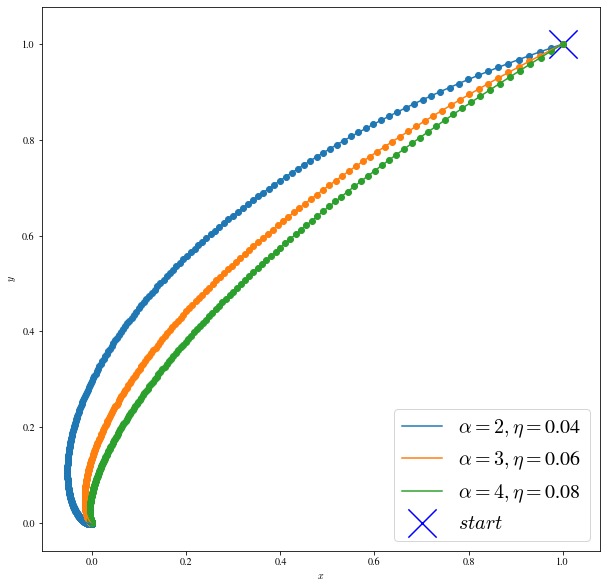

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(1,1,c='blue',marker='x',s=800)
for i in range(2,5):
        a,b = CGO(1,1,i,i*0.02)
        plt.scatter(a,b)
        plt.plot(a,b)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend([r"$\alpha=2,\eta=$"+str(0.04),r"$\alpha=3,\eta=$"+str(0.06),r"$\alpha=4,\eta=$"+str(0.08),"$start$"], loc ="lower right",prop={'size': 20})
